In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
# Require cuda and cudnn
assert torch.cuda.is_available()
assert torch.backends.cudnn.enabled

In [4]:
%run ../../lib/download.py http://files.fast.ai/data/dogscats.zip data/lesson_1/

In [5]:
dogscats_dir = 'data/lesson_1/dogscats/'
train_data = path.join( dogscats_dir, 'train' )

PATH = dogscats_dir
sz = 224

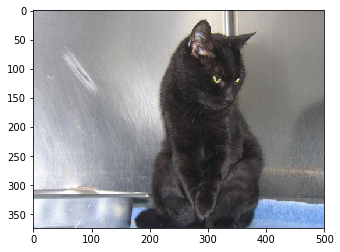

In [6]:
random_image_path = np.random.choice( os.listdir( path.join( train_data, 'cats' ) ) )
random_image = plt.imread( path.join( train_data, 'cats', random_image_path ) )
plt.imshow( random_image )

In [7]:
arch = resnet34
data = ImageClassifierData.from_paths( PATH, tfms=tfms_from_model( arch, sz ) )
learn = ConvLearner.pretrained( arch, data, precompute=True )
learn.fit( 0.1, 2 )

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


  1%|          | 4/360 [00:00<00:25, 13.95it/s, loss=tensor(0.2888, device='cuda:0')]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 34%|███▍      | 122/360 [00:03<00:06, 37.50it/s, loss=tensor(1.00000e-02 *
 34%|███▍      | 122/360 [00:03<00:06, 37.30it/s, loss=tensor(1.00000e-02 *
 34%|███▍      | 122/360 [00:03<00:06, 37.13it/s, loss=tensor(1.00000e-02 *
 34%|███▍      | 122/360 [00:03<00:06, 37.07it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.52it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.44it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.37it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.28it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.21it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.13it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 42.05it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 41.97it/s, loss=tensor(1.00000e-02 *
 39%|███▉      | 140/360 [00:03<00:05, 41.91it/s, loss=tensor(1.00000e-02 *
 39%|███▉   

In [8]:
labels = data.val_y
labels

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
data.classes
log_preds = learn.predict()
log_preds.shape
preds = np.argmax( log_preds, axis=1 )
probs = np.exp( log_preds )

In [10]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


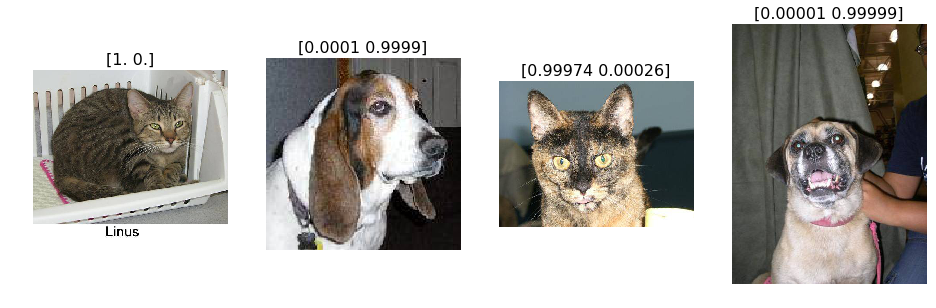

In [11]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


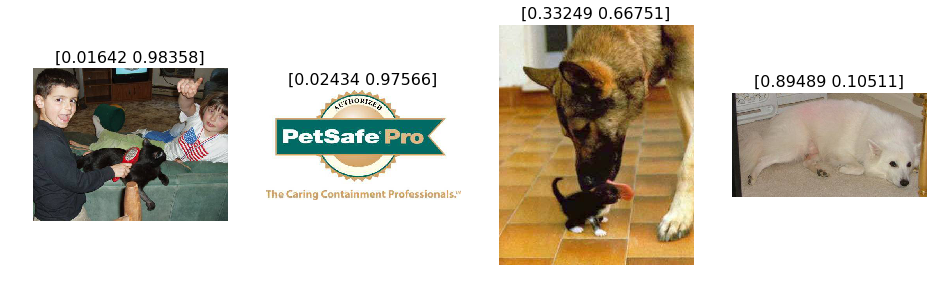

In [12]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

## Find Learning Rate Automatically

In [13]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [14]:
learning_rate = learn.lr_find()

  1%|          | 3/360 [00:00<00:33, 10.54it/s, loss=tensor(0.8273, device='cuda:0')]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 84%|████████▍ | 303/360 [00:04<00:00, 73.56it/s, loss=tensor(0.4549, device='cuda:0')]


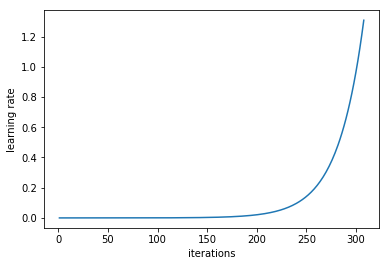

In [15]:
learn.sched.plot_lr()

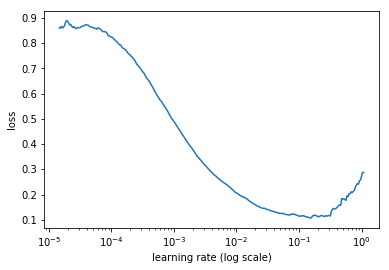

In [16]:
learn.sched.plot()

## Data Augmentation

In [17]:
transforms = tfms_from_model( resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1 )

In [18]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=transforms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [19]:
ims = np.stack([get_augs() for i in range(6)])

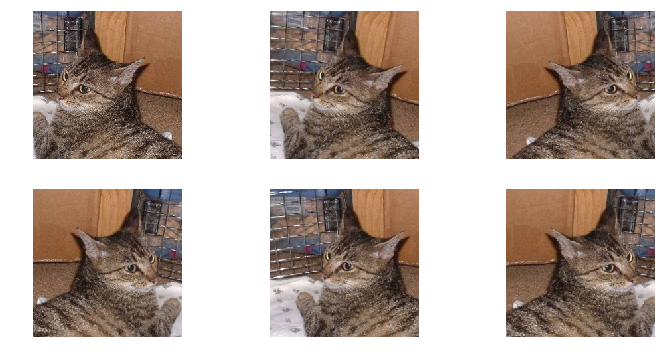

In [20]:
plots(ims, rows=2)

In [21]:
data = ImageClassifierData.from_paths(PATH, tfms=transforms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [22]:
learn.fit(1e-2, 1)

  1%|          | 4/360 [00:00<00:23, 15.06it/s, loss=tensor(0.6237, device='cuda:0')]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 17%|█▋        | 60/360 [00:02<00:10, 27.51it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 60/360 [00:02<00:11, 27.13it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 60/360 [00:02<00:11, 26.72it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:10, 28.43it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:10, 27.54it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:10, 27.16it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:11, 26.68it/s, loss=tensor(1.00000e-02 *
 19%|█▉        | 68/360 [00:02<00:10, 28.28it/s, loss=tensor(1.00000e-02 *
 19%|█▉        | 68/360 [00:02<00:10, 28.00it/s, loss=tensor(1.00000e-02 *
 20%|█▉        | 71/360 [00:02<00:10, 27.92it/s, loss=tensor(1.00000e-02 *
 20%|█▉        | 71/360 [00:02<00:10, 27.27it/s, loss=tensor(1.00000e-02 *
 20%|█▉        | 71/360 [00:02<00:10, 27.15it/s, loss=tensor(1.00000e-02 *
 21%|██        | 75/360 [00:02<00:09, 28.61it/s, loss=tensor(1.00000e-02 *
 21%|██        | 75/360 [

In [23]:
learn.precompute = False

In [24]:
learn.fit( 1e-2, 3, cycle_len=1 )

  0%|          | 0/360 [00:02<?, ?it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:02<16:41,  2.79s/it, loss=tensor(1.00000e-02 *
       6.4702, device='cuda:0')]

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


  0%|          | 1/360 [00:03<18:19,  3.06s/it, loss=tensor(1.00000e-02 *
  1%|          | 2/360 [00:03<09:09,  1.53s/it, loss=tensor(1.00000e-02 *
  1%|          | 2/360 [00:03<09:55,  1.66s/it, loss=tensor(1.00000e-02 *
  1%|          | 3/360 [00:03<06:36,  1.11s/it, loss=tensor(1.00000e-02 *
  1%|          | 3/360 [00:03<07:08,  1.20s/it, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<05:22,  1.10it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<05:44,  1.03it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:35,  1.29it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:04<04:50,  1.22it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:04<04:01,  1.46it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:04<04:18,  1.37it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:40,  1.60it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:53,  1.51it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:23,  

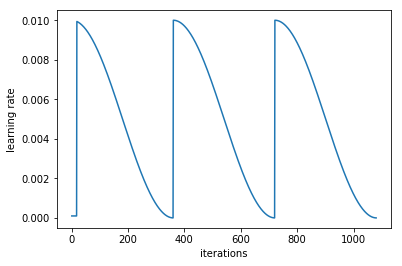

In [25]:
learn.sched.plot_lr()

In [26]:
learn.save('224_lastlayer')

In [27]:
learn.load('224_lastlayer')

Set up a per-layer learning rate, so we don't mess up the pre-trained imagenet layers

In [31]:
learn.unfreeze()

In [34]:
lr = np.array([1e-4,1e-3,1e-2])

In [35]:
learn.fit( lr, 3, cycle_len=1, cycle_mult=2 )

  0%|          | 0/360 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /pytorch/aten/src/THC/generic/THCStorage.cu:58

In [ ]:
accuracy_np(probs, y)